In [1]:
import numpy as np
import matplotlib.pyplot as plt
import my_hmf_cmf_lib as mycmf

In [2]:
plt.style.use('stylesheet.mplstyle')

In [3]:
A = 1
B =  1

theta = np.linspace(0, 2*np.pi, 1000)

r = A * (1 - np.cos(theta))
t = B * (theta - np.sin(theta))

tmax = np.pi

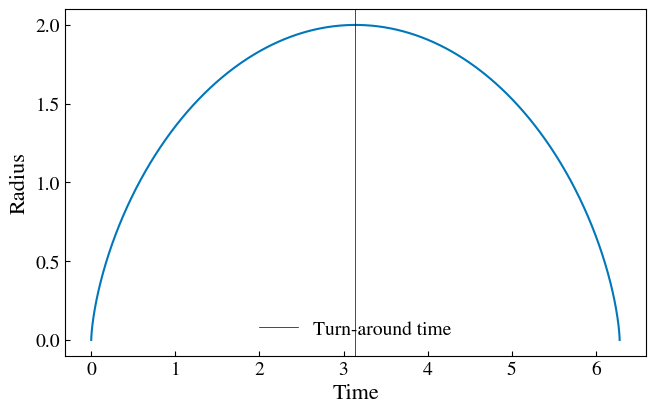

In [4]:
plt.figure()
plt.plot(t,r)
plt.xlabel('Time')
plt.ylabel('Radius')
plt.axvline(tmax, color='black', lw=0.5, label = "Turn-around time")
plt.legend()
plt.show()

In [5]:
def compute_dl(t):
    res= 3/20*(6*np.pi)**(2/3)*(t/tmax)**(2/3)
    return res

def sc_model(theta):
    res = 9/2*(theta-np.sin(theta))**2/(1-np.cos(theta))**3 - 1
    return res

/tmp/ipykernel_1585332/215307421.py:6: RuntimeWarning: divide by zero encountered in divide
  res = 9/2*(theta-np.sin(theta))**2/(1-np.cos(theta))**3 - 1
/tmp/ipykernel_1585332/215307421.py:6: RuntimeWarning: invalid value encountered in divide
  res = 9/2*(theta-np.sin(theta))**2/(1-np.cos(theta))**3 - 1


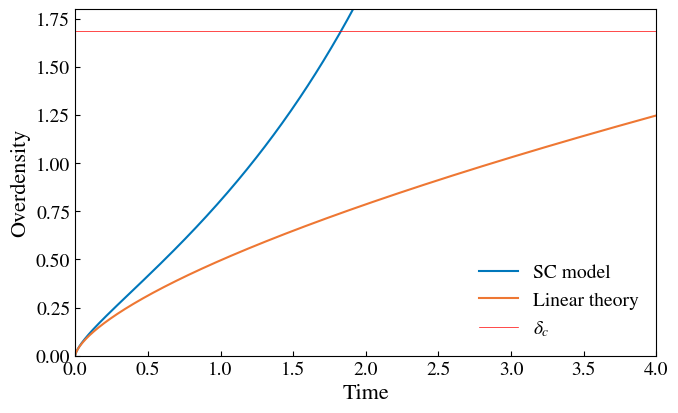

In [6]:
plt.figure()
plt.plot(t,sc_model(theta), label = "SC model")
plt.plot(t,compute_dl(t), label = "Linear theory")
plt.axhline(mycmf.delta_c, color='red', lw=0.5, label = "$\delta_c$")
plt.xlabel('Time')
plt.ylabel('Overdensity')
plt.xlim(0,4)
plt.ylim(0,1.8)
plt.legend()
plt.show()

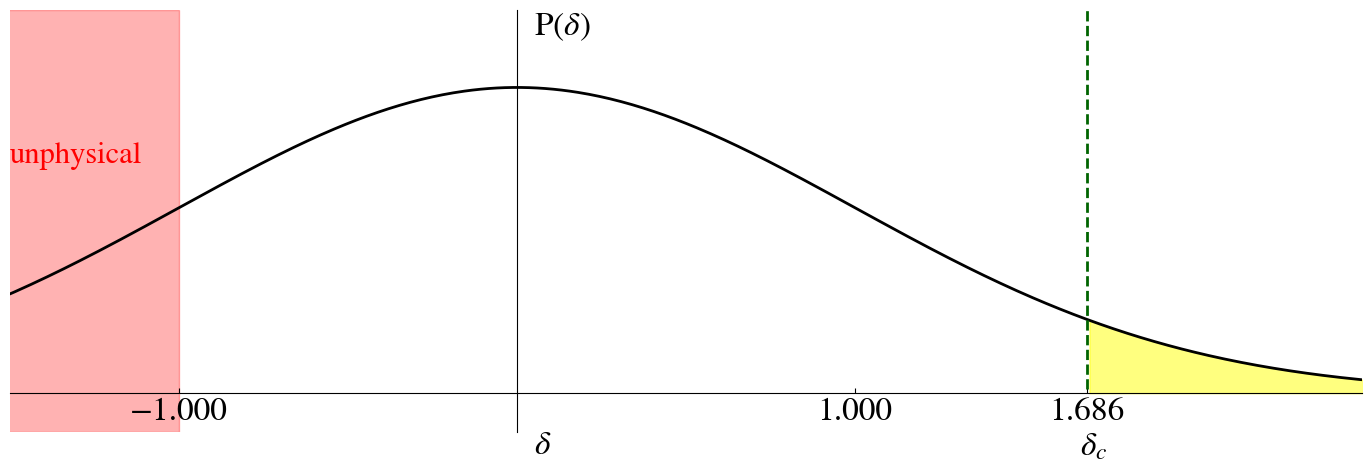

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

dc=1.686
fontsize = 24

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 5))

# Gaussian parameters
mu = 0
sigma = 1

# x and y values
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

# Plot Gaussian
ax.plot(x, y, label='Gaussian', color='black', lw=2)

# Shade unphysical region (x < -1)
ax.axvspan(xmin=-4, xmax=-1, color='red', alpha=0.3)

# Shade another region (x > 1) for context
x_fill = x[x > dc]
y_fill = y[x > dc]
ax.fill_between(x_fill, y_fill, color='yellow', alpha=0.5)

ax.axvline(x=dc, ymin=0.1, color='darkgreen', linestyle='--', lw=2, label='$\delta_c$')

# Add annotation
ax.text(-1.5, 0.3, 'unphysical', color='red', fontsize=fontsize-2)

# Remove y-axis ticks
ax.set_yticks([])
ax.set_xticks([-1, 1, 1.686])

ax.tick_params(labelsize=fontsize)

# Set axis limits
ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-0.05, 0.5)

# Custom axis labels manually placed
ax.text(0.05, 0.5, 'P($\delta$)', fontsize=fontsize, verticalalignment='top')
ax.text(0.05, -0.05, '$\delta$', fontsize=fontsize, verticalalignment='top')
ax.text(dc-0.02, -0.05, '$\delta_c$', fontsize=fontsize, verticalalignment='top')


# Move axes to center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks only on bottom and left
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Layout and show
fig.tight_layout()
plt.savefig('./saved_results/misc/gauss_biblio_project.svg', bbox_inches='tight', transparent=True)
plt.show()


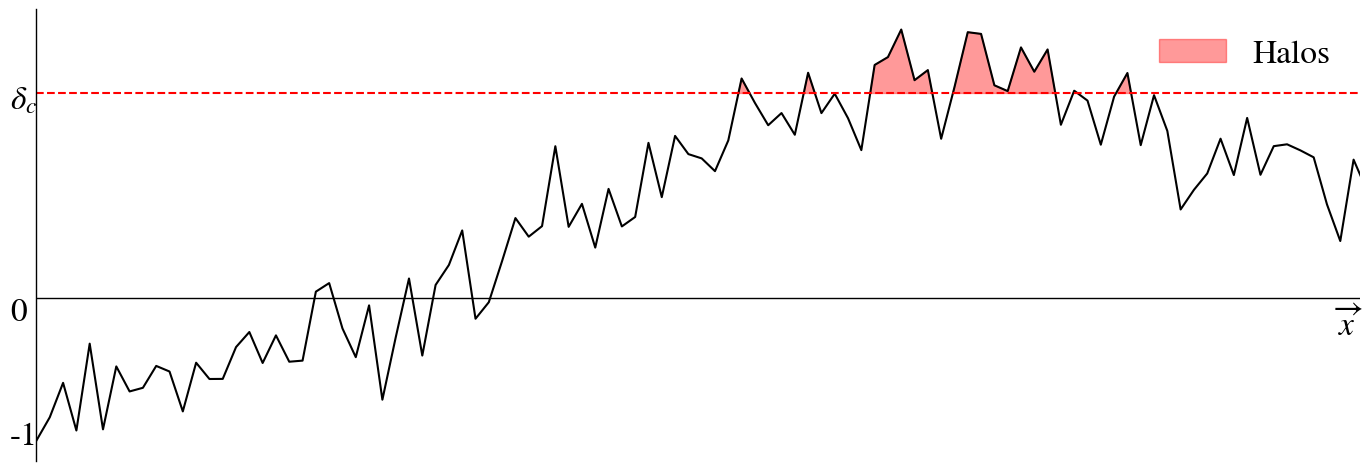

In [9]:
from scipy.ndimage import gaussian_filter1d

fontsize = 24

fig, ax = plt.subplots(figsize=(14, 5))

# Generate a 1D random walk
np.random.seed(400)
n_points = 200
steps = np.random.normal(loc=0, scale=1, size=n_points)
walk = np.cumsum(steps)

x = np.linspace(0, 1, n_points)
y = (walk - np.min(walk)) / (np.max(walk) - np.min(walk))

# Smooth the curve to represent the 'fit'
smooth_y = gaussian_filter1d(y, sigma=4)

# Add small random noise
noise = np.random.normal(scale=0.07, size=n_points)
noisy_y = smooth_y + noise
noisy_y[0] -= 0.1  # Manual tweak

# Thresholds
y_mid = 0.3
y_threshold = 0.795

# Plot non-noisy smooth curve
# ax.plot(x, smooth_y, color='gray', linewidth=1, linestyle='--', label="Smoothed")

# Plot noisy curve
ax.plot(x, noisy_y, color='black', linewidth=1.5,)

# Reference lines
ax.axhline(y=y_mid, color='black', linewidth=1)
ax.axhline(y=y_threshold, color='red', linestyle='--', linewidth=1.5)

# Fill area where noisy_y > y_threshold
ax.fill_between(x, noisy_y, y_threshold, where=(noisy_y > y_threshold),
                color='red', alpha=0.4, interpolate=True, label="Halos")

# Hide ticks
ax.set_xticks([])
ax.set_yticks([])

# Axis labels
ax.text(-0.01, y_mid, '0', fontsize=fontsize, verticalalignment='top')
ax.text(-0.01, y_threshold+0.02, '$\delta_c$', fontsize=fontsize, verticalalignment='top')
ax.text(0.49, y_mid - 0.02, '$\overrightarrow{x}$', fontsize=fontsize, verticalalignment='top')

ax.text(-0.01, 0, '-1', fontsize=fontsize, verticalalignment='top')

# plt.vlines(0.2655, y_mid, y_threshold, color='blue', linestyle='--', linewidth=1.5, label="First crossing")


# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(1)

ax.set_xlim(0, 0.5)
ax.legend(fontsize=fontsize)
plt.tight_layout()
plt.savefig('./saved_results/misc/random_walk.svg', bbox_inches='tight', transparent=True)
plt.show()